In [2]:
from prac_code.tables import start
from prac_code.value import Value
from prac_code.plotter import Plotter

In [3]:
import pandas as pd
import numpy as np

Заполнение таблиц значениями. Выполняется однажды

In [4]:
# start()

**Упражнение 1**

In [5]:
tab1 = pd.read_csv("tables/1.csv", sep='\t')

In [7]:
tab1.U = tab1.U.apply(Value) + Value(values=[0.0], syst=1.0)
tab1.I = tab1.I.apply(Value) + Value(values=[0.0], syst=0.01)
tab1

,U,I
0,0.0 ± 1.0,0.015 ± 0.010
1,10.0 ± 1.0,0.393 ± 0.010
2,20.0 ± 1.0,1.127 ± 0.010
3,30.0 ± 1.0,1.950 ± 0.010
4,40.0 ± 1.0,3.075 ± 0.010
5,50.0 ± 1.0,4.285 ± 0.010
6,60.0 ± 1.0,5.563 ± 0.010
7,70.0 ± 1.0,6.691 ± 0.010
8,80.0 ± 1.0,8.041 ± 0.010
9,90.0 ± 1.0,9.425 ± 0.010


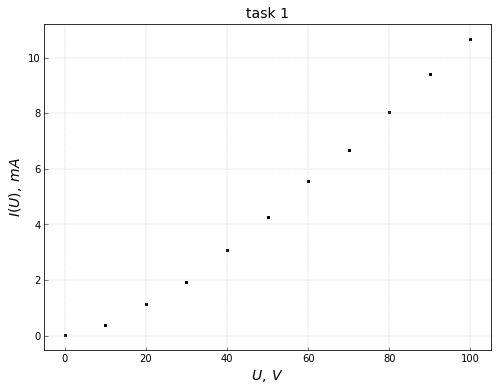

In [26]:
fit = Plotter(draw_legend=False).set_name("task1").set_title("task 1").set_y_name("$I(U),\:mA$").set_x_name(
        "$U,\:V$"). \
        add_line(Plotter.get_new_line(y_value=tab1.I, x_value=tab1.U,
                                      draw_error=False, legend='$f_1 = 300Hz$', fit=False, color='black', marker="s")). \
        plot(show=True, save=True)

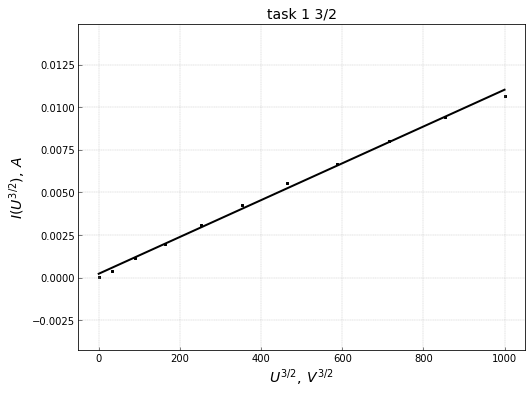

In [27]:
fit, *_ = Plotter(draw_legend=False).set_name("task1").set_title("task 1 3/2").set_y_name("$I(U^{3/2}),\:A$").set_x_name(
        "$U^{3/2},\:V^{3/2}$"). \
        add_line(Plotter.get_new_line(y_value=tab1.I / 1000, x_value=tab1.U.apply(lambda v: v.use_func(lambda x: x**(3/2))),
                                      draw_error=False, legend='$f_1 = 300Hz$', fit=True, color='black', marker="s")). \
        plot(show=True, save=True)

In [28]:
from math import pi

In [29]:
C = Value(values=[fit.a], syst=fit.sigma_a)
A = 2.85
epsilon0 = 8.85 * 10**-12 

In [30]:
em = (C / (A * epsilon0)) ** 2

In [31]:
print(em)

1.83e+11 ± 7e+9


удивительно, но это сходится в пределах погрешности. Где-то я не прав, но не знаю, где. Может, это случайно вышло

**Упражнение 2**

In [40]:
tab2 = pd.read_csv("tables/2_30.csv", sep='\t')
tab3 = pd.read_csv("tables/2_40.csv", sep='\t')
tab4 = pd.read_csv("tables/2_50.csv", sep='\t')
tab2.I = tab2.I.apply(Value) + Value(values=[0.0], syst=0.1)
tab2.Ia = tab2.Ia.apply(Value) + Value(values=[0.0], syst=0.01)
tab3.I = tab3.I.apply(Value) + Value(values=[0.0], syst=0.1)
tab3.Ia = tab3.Ia.apply(Value) + Value(values=[0.0], syst=0.01)
tab4.I = tab4.I.apply(Value) + Value(values=[0.0], syst=0.1)
tab4.Ia = tab4.Ia.apply(Value) + Value(values=[0.0], syst=0.01)

In [41]:
tab2.head()

,I,Ia
0,0.10 ± 0.10,1.850 ± 0.010
1,0.20 ± 0.10,1.850 ± 0.010
2,0.30 ± 0.10,1.850 ± 0.010
3,0.40 ± 0.10,1.850 ± 0.010
4,0.50 ± 0.10,1.850 ± 0.010


In [43]:
k = 9.8

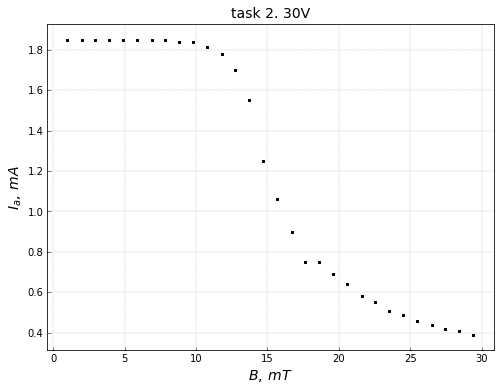

In [44]:
fit = Plotter(draw_legend=False).set_name("task230").set_title("task 2. 30V").set_y_name("$I_a,\:mA$").set_x_name(
        "$B,\:mT$"). \
        add_line(Plotter.get_new_line(y_value=tab2.Ia, x_value=tab2.I * k,
                                      draw_error=False, legend='$f_1 = 300Hz$', fit=False, color='black', marker="s")). \
        plot(show=True, save=True)

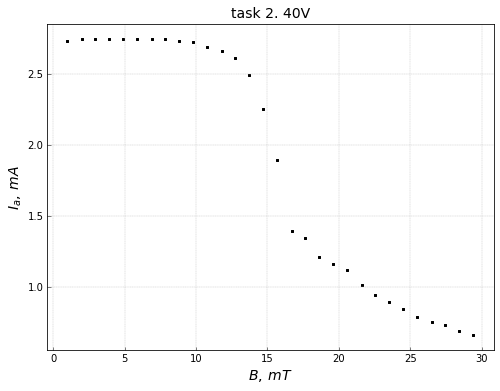

In [45]:
fit = Plotter(draw_legend=False).set_name("task240").set_title("task 2. 40V").set_y_name("$I_a,\:mA$").set_x_name(
        "$B,\:mT$"). \
        add_line(Plotter.get_new_line(y_value=tab3.Ia, x_value=tab3.I * k,
                                      draw_error=False, legend='$f_1 = 300Hz$', fit=False, color='black', marker="s")). \
        plot(show=True, save=True)

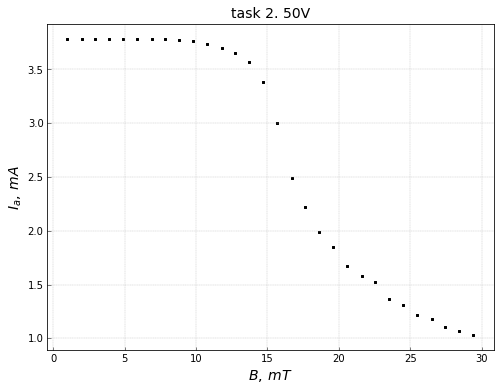

In [46]:
fit = Plotter(draw_legend=False).set_name("task250").set_title("task 2. 50V").set_y_name("$I_a,\:mA$").set_x_name(
        "$B,\:mT$"). \
        add_line(Plotter.get_new_line(y_value=tab4.Ia, x_value=tab4.I * k,
                                      draw_error=False, legend='$f_1 = 300Hz$', fit=False, color='black', marker="s")). \
        plot(show=True, save=True)